In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
# customer ID is useless so I will drop it !

df.drop("customerID" , axis=1 , inplace = True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
#checking if we have null values

df.isnull().count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [90]:
# changing the Total charges type into float

df1 = df[df.TotalCharges != ' ']

df1.shape

(7032, 20)

In [91]:
df1['TotalCharges'] = df1['TotalCharges'].astype("float")

print(df1.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


<ipython-input-91-7b758806efe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype("float")


In [92]:
tenure_ChurnNO = df1[ df1.Churn =="No" ].tenure

tenure_ChurnYes = df1[ df1.Churn =="Yes" ].tenure

print(tenure_ChurnNO.count())
print(tenure_ChurnYes.count())

5163
1869


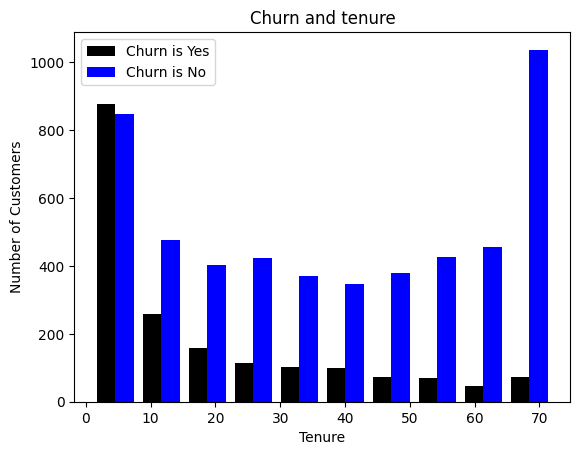

In [93]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.hist([tenure_ChurnYes,tenure_ChurnNO] , color = ['black' , 'blue'] , label = ['Churn is Yes','Churn is No'])
plt.title("Churn and tenure")

plt.legend()

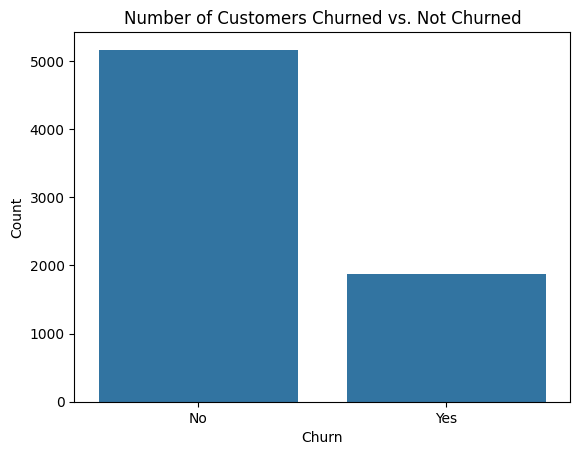

'\nso there is a huge bias in the dataset to Churned No\nso we will cure that by using\nthe statrified sampling\n'

In [94]:
sns.countplot(x='Churn', data=df1)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Number of Customers Churned vs. Not Churned')
plt.show()

"""
so there is a huge bias in the dataset to Churned No
so we will cure that by using
the statrified sampling
"""


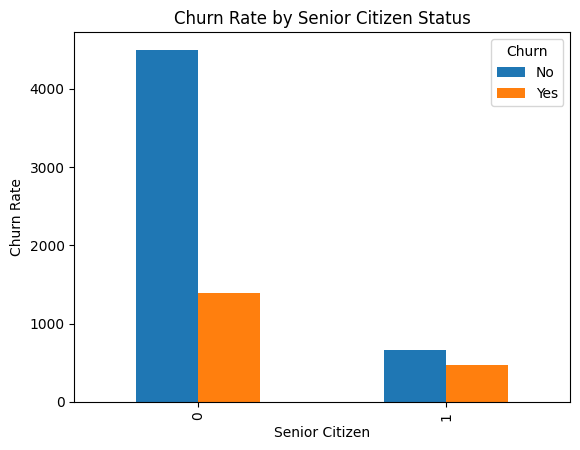

In [95]:
df1.groupby('SeniorCitizen')['Churn'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.show()


In [96]:
def print_unqiue_column(df1):
  for column in df1.columns :
    if df1[column].dtypes == 'object':
      print(f"{column} : {df1[column].unique()}")


In [97]:
df1.replace(["No internet service","No phone service"] , "No" , inplace = True)
df1.replace({"Female" : 0 , "Male" : 1} , inplace=True )


print_unqiue_column(df1)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<ipython-input-97-bfa1f452d672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(["No internet service","No phone service"] , "No" , inplace = True)
<ipython-input-97-bfa1f452d672>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({"Female" : 0 , "Male" : 1} , inplace=True )


In [98]:
yes_and_no_cols = ['Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection'
,'OnlineBackup','OnlineSecurity','MultipleLines',
                   'PhoneService','Dependents','Partner']

for col in yes_and_no_cols:
  df1[col].replace({"No" : 0 , "Yes" : 1} , inplace=True)

<ipython-input-98-a7320dbe4809>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"No" : 0 , "Yes" : 1} , inplace=True)


In [99]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


# One-Hot Encoding

In [100]:
df1 = pd.get_dummies(data=df1 , columns= ["InternetService" , "Contract" , "PaymentMethod"])


In [101]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#Data Scaling

In [102]:
df1[['tenure','TotalCharges','MonthlyCharges']].head(4)

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30


In [103]:
# we need to scale the data before feeding the NN with it !

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['tenure','TotalCharges','MonthlyCharges']


df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [104]:
df1[['tenure','TotalCharges','MonthlyCharges']].head(4)

,tenure,TotalCharges,MonthlyCharges
0,0.000000,0.001275,0.115423
1,0.464789,0.215867,0.385075
2,0.014085,0.010310,0.354229
3,0.619718,0.210241,0.239303


#Splitting the data

In [105]:
# as we knew before that there's bias in the target column in this data set
# so i will use the startified smapling

# Features
x = df1.drop('Churn' , axis=1)

# Target
y = df1['Churn']

print(y[:5])

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x,y, stratify = y , random_state=42)

# Building the ANN


In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import BinaryCrossentropy

model  = keras.Sequential([
        keras.layers.Dense(20 , input_shape = (26,) , activation= 'relu'),
        keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8174
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8178
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8172
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8191
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8159
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8174
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8189
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8199
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8182
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3856 - accura

In [135]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7827


[0.442414790391922, 0.7827076315879822]

In [136]:
yp = model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [137]:
yp[:5]

array([[0.71760154],
       [0.01789761],
       [0.33458754],
       [0.7391792 ],
       [0.1952198 ]], dtype=float32)

In [138]:
y_pred = []

for i in yp:
  if i > 0.5:
    y_pred.append(1)

  else:
    y_pred.append(0)


print(y_pred[:5])

[1, 0, 0, 1, 0]


In [139]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1291
           1       0.61      0.52      0.56       467

    accuracy                           0.78      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.77      0.78      0.78      1758



Text(95.72222222222221, 0.5, 'Truth')

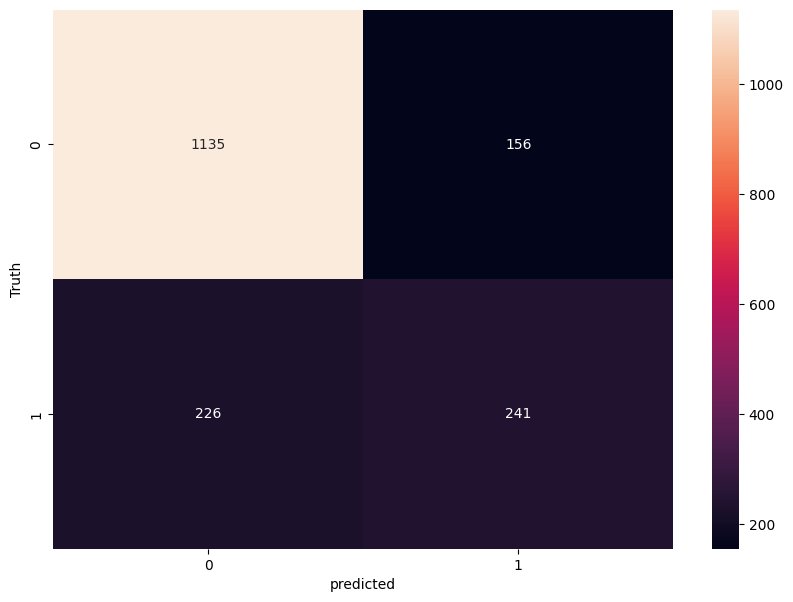

In [140]:
con_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))

sns.heatmap(con_mat , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")